# Manipulate Data with PyTorch

In this exercise, you will practice manipulating tensors and forming dataset batches using PyTorch.

We will focus on handling data efficiently in PyTorch before diving into deep learning model building.


In [35]:
import torch
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits


## Practice Tensor Operations

1️⃣ Create a tensor named `tensor1` containing the values `[0,1,2,3,4,5,6,7]` and a tensor named `tensor2` containing the values `[0,1,2,0,1,2]`, ensuring `tensor2` is mutable.


In [15]:
tensor1 = torch.tensor([0,1,2,3,4,5,6,7], dtype=torch.float32)
tensor2 = torch.tensor([0,1,2,0,1,2], dtype=torch.float32, requires_grad=True)

print(tensor1)
print(tensor2)

tensor([0., 1., 2., 3., 4., 5., 6., 7.])
tensor([0., 1., 2., 0., 1., 2.], requires_grad=True)



2️⃣ Reshape `tensor1` to have 2 columns and 4 rows, and `tensor2` to have 2 rows and 3 columns.


In [16]:
tensor1 = tensor1.reshape(4, -1)
tensor2 = tensor2.reshape(2, -1)

print(tensor1)
print(tensor2)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.]])
tensor([[0., 1., 2.],
        [0., 1., 2.]], grad_fn=<ViewBackward0>)


3️⃣ Create `tensor3` with the same shape as `tensor2`, filled with ones.


In [17]:
tensor3 = torch.ones_like(tensor2)

print(tensor3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


4️⃣ Modify `tensor2` by subtracting `tensor3` using an in-place operation.


In [18]:
tensor2 = tensor2 - tensor3

print(tensor2)

tensor([[-1.,  0.,  1.],
        [-1.,  0.,  1.]], grad_fn=<SubBackward0>)


5️⃣ Perform matrix multiplication between `tensor1` and `tensor2`. 


In [19]:
print(f"Matrix multiplication : {torch.matmul(tensor1, tensor2)}")

Matrix multiplication : tensor([[ -1.,   0.,   1.],
        [ -5.,   0.,   5.],
        [ -9.,   0.,   9.],
        [-13.,   0.,  13.]], grad_fn=<MmBackward0>)


## Handling Tabular Data

6️⃣ Load the MNIST digits dataset using `sklearn.datasets.load_digits`.


In [21]:
digits = load_digits()


7️⃣ Extract the `data` and `target` values.

In [31]:
data = digits.data
target = digits.target

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

8️⃣ Visualize the first image in the dataset.

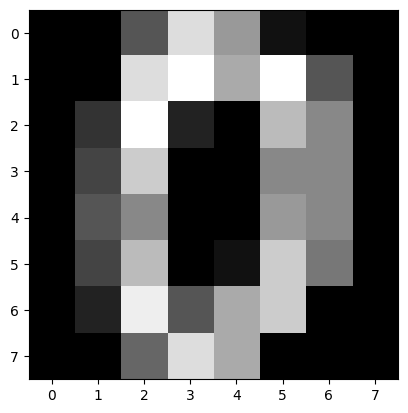

In [36]:
first_image = data[0, :].reshape([8, 8])
plt.imshow(first_image, cmap='gray')
plt.show()

9️⃣ Normalize the data by dividing each pixel value by 255.

In [37]:
data = data / 255.0

### Split Using PyTorch

1️⃣ Create a dataset object from tensors.

In [39]:
dataset = TensorDataset(torch.tensor(data, dtype=torch.float32), torch.tensor(target, dtype=torch.long))

2️⃣ Split the dataset manually using indexing.

In [41]:
n_train = int(0.6 * len(dataset))
n_val = int(0.2 * len(dataset))
n_test = len(dataset) - n_train - n_val

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

3️⃣ Shuffle and batch the dataset, then display a batch.

In [43]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

for x, y in train_loader:
    print('Train batch:', x.shape, y.shape)
    break

Train batch: torch.Size([8, 64]) torch.Size([8])


## 🔹 **Example: Using `.backward()` for Automatic Differentiation**
Let’s manually compute the gradient of a function $ y = x^2 $ at $ x = 3 $:

In [44]:
# Define a tensor with gradient tracking enabled
x = torch.tensor(3.0, requires_grad=True)

# Define a function y = x^2
y = x ** 2

# Compute the gradient of y with respect to x
y.backward()

# Print the gradient (dy/dx)
print(x.grad)  # Output: tensor(6.)

tensor(6.)


Congratulations, you have successfully practiced data manipulation in PyTorch! 🚀
